### Introduction

The global video game industry is characterized by rapidly evolving consumer preferences and regional distinctions that shape the success of platforms and game genres. Understanding these preferences is essential for developers and marketers looking to maximize the impact of their products. This project aims to analyze a comprehensive dataset of video game sales, exploring trends across North America, Europe, and Japan to identify the platforms and genres that resonate most with players in each region.

The dataset encompasses over 16,000 games and includes information on platforms, genres, release years, and regional sales, as well as user and critic ratings. By analyzing these factors, we seek to uncover patterns that can inform strategic decisions for future game development, marketing campaigns, and platform investments. Specifically, this analysis will address questions such as:

- Which platforms and genres are most popular in each region?
- How do user and critic scores correlate with game sales?
- What are the distinct gaming preferences across North America, Europe, and Japan?

The insights from this project will enable targeted advertising strategies and informed development decisions, helping companies better meet the needs of diverse regional markets and ultimately increase their competitive edge in the global video game industry.

### Data Description

The dataset includes the following columns:

- **Name**: Title of the video game.
- **Platform**: Platform on which the game was released (e.g., Xbox, PlayStation).
- **Year_of_Release**: Year the game was released.
- **Genre**: Genre of the game (e.g., Action, Sports).
- **NA_sales**: North American sales in USD million.
- **EU_sales**: European sales in USD million.
- **JP_sales**: Japanese sales in USD million.
- **Other_sales**: Sales in other regions (not specified) in USD million.
- **Critic_Score**: Average critic score for the game (scale of 0 to 100).
- **User_Score**: Average user score for the game (scale of 0 to 10).
- **Rating**: ESRB rating (Entertainment Software Rating Board), indicating the recommended age group for the game (e.g., E for Everyone, T for Teen).

> **Note**: Data for 2016 may be incomplete, which could impact trends observed for that year.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the dataset 
data = pd.read_csv(r'C:\Users\Rawaa\OneDrive\Documents\GitHub\pro-5\games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [32]:
# Display the first few rows of the dataset
display(data.head())

# Display general information about the dataset
data.info()

# Summary statistics for numerical columns
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [33]:
# Display column names to check for naming issues
display(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [34]:
# Convert all column names to lowercase
data.columns = data.columns.str.lower()
# Convert 'user_score' to numeric, treating 'TBD' as NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Fill missing values in 'user_score' with the median after conversion
data['user_score'] = data['user_score'].fillna(data['user_score'].median())

In [35]:
from IPython.display import display

# Convert 'user_score' to numeric, treating 'TBD' as NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Fill missing values in 'critic_score' and 'user_score' with the median
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].median())
data['user_score'] = data['user_score'].fillna(data['user_score'].median())

# Display the updated DataFrame to confirm changes
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN


In [37]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)
#Convert year_of_release to Integer: Ensure year_of_release is an integer, as it’s currently in float format.
data['year_of_release'] = data['year_of_release'].astype(int)
#Fill Missing Values in rating: To handle missing values in rating, you can fill them with a placeholder like 'Unknown':
data['rating'] = data['rating'].fillna('Unknown')
#Create a total_sales Column: Calculate the total sales by summing across all regional sales columns.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Step 2: Exploratory Data Analysis (EDA)

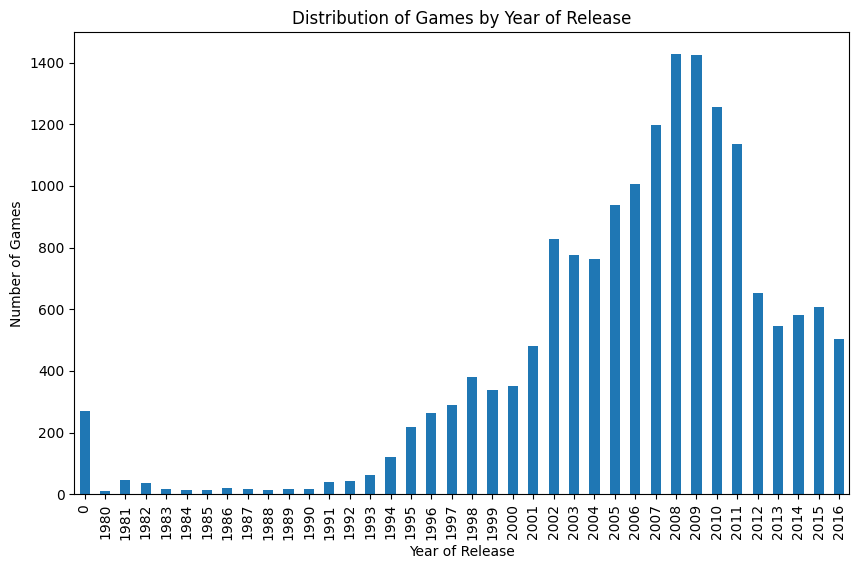

In [38]:
#1. Distribution of Games by Year
import matplotlib.pyplot as plt

data['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Games by Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.show()

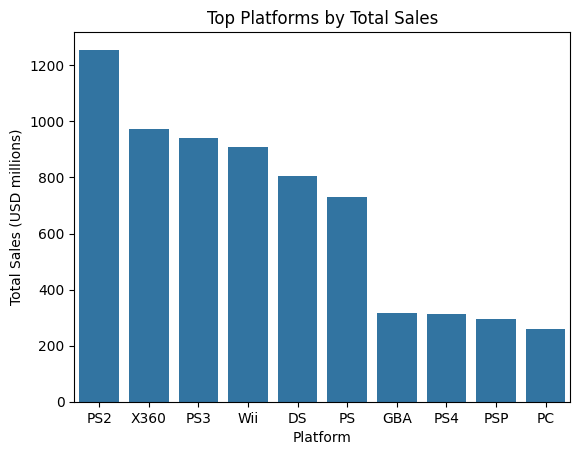

In [39]:
#2. Top Platforms by Total Sales
import seaborn as sns

top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_platforms.index, y=top_platforms.values)
plt.title("Top Platforms by Total Sales")
plt.xlabel("Platform")
plt.ylabel("Total Sales (USD millions)")
plt.show()

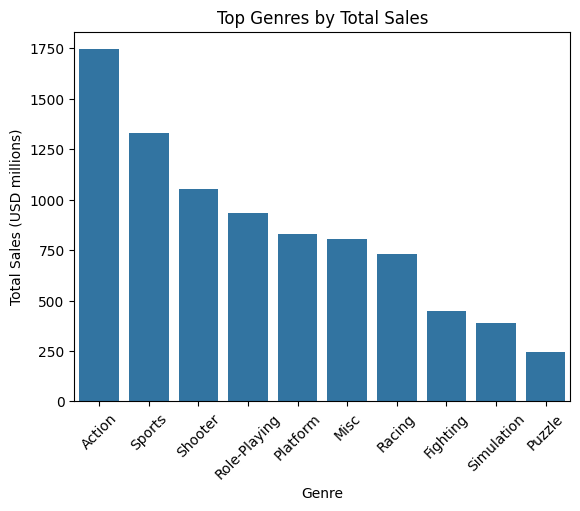

In [40]:
#3. Genre Popularity
top_genres = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("Top Genres by Total Sales")
plt.xlabel("Genre")
plt.ylabel("Total Sales (USD millions)")
plt.xticks(rotation=45)
plt.show()

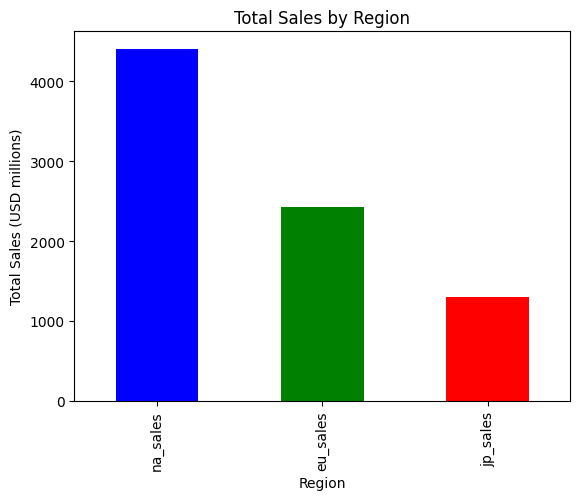

In [41]:
#4. Regional Sales Comparison
region_sales = data[['na_sales', 'eu_sales', 'jp_sales']].sum()
region_sales.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD millions)")
plt.show()

Step 3: Investigate the Impact of Reviews on Sales

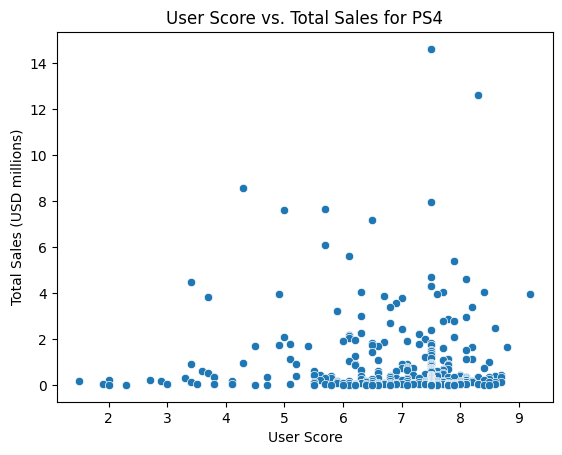

Correlation between User Score and Total Sales: -0.06275557891282872


In [42]:
#Correlation Between User Score and Total Sales
platform_data = data[data['platform'] == 'PS4']
sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
plt.title("User Score vs. Total Sales for PS4")
plt.xlabel("User Score")
plt.ylabel("Total Sales (USD millions)")
plt.show()

# Calculate correlation
correlation = platform_data[['user_score', 'total_sales']].corr()
print("Correlation between User Score and Total Sales:", correlation.loc['user_score', 'total_sales'])

Step 4: Create User Profiles by Region

In [43]:
#1. Top Platforms per Region
top_na_platforms = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_eu_platforms = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_jp_platforms = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top Platforms in North America:\n", top_na_platforms)
print("Top Platforms in Europe:\n", top_eu_platforms)
print("Top Platforms in Japan:\n", top_jp_platforms)

Top Platforms in North America:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top Platforms in Europe:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top Platforms in Japan:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [44]:
#2. Top Genres per Region
top_na_genres = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_eu_genres = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_jp_genres = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top Genres in North America:\n", top_na_genres)
print("Top Genres in Europe:\n", top_eu_genres)
print("Top Genres in Japan:\n", top_jp_genres)

Top Genres in North America:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top Genres in Europe:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top Genres in Japan:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [45]:
#3. Effect of ESRB Ratings on Sales by Region
rating_sales_na = data.groupby('rating')['na_sales'].mean().sort_values(ascending=False)
rating_sales_eu = data.groupby('rating')['eu_sales'].mean().sort_values(ascending=False)
rating_sales_jp = data.groupby('rating')['jp_sales'].mean().sort_values(ascending=False)

print("Sales by ESRB Rating in North America:\n", rating_sales_na)
print("Sales by ESRB Rating in Europe:\n", rating_sales_eu)
print("Sales by ESRB Rating in Japan:\n", rating_sales_jp)

Sales by ESRB Rating in North America:
 rating
AO         1.260000
K-A        0.853333
M          0.478874
E          0.324058
T          0.256586
E10+       0.248817
EC         0.191250
Unknown    0.183633
RP         0.000000
Name: na_sales, dtype: float64
Sales by ESRB Rating in Europe:
 rating
AO         0.610000
M          0.309642
E          0.178008
T          0.144218
E10+       0.132761
Unknown    0.090723
K-A        0.090000
RP         0.026667
EC         0.013750
Name: eu_sales, dtype: float64
Sales by ESRB Rating in Japan:
 rating
K-A        0.486667
Unknown    0.124440
T          0.051131
E          0.049652
M          0.041100
E10+       0.028310
AO         0.000000
EC         0.000000
RP         0.000000
Name: jp_sales, dtype: float64


Step 5: Hypothesis Testing
Hypothesis: User Ratings of Action vs. Sports Genres
Null Hypothesis (H0): The average user ratings for Action and Sports genres are the same.
Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are different.

In [46]:
from scipy import stats

# Filter data for Action and Sports genres
action_ratings = data[data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = data[data['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
t_stat, p_val = stats.ttest_ind(action_ratings, sports_ratings)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in user ratings between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in user ratings between Action and Sports genres.")

T-statistic: 0.3676581294613721
P-value: 0.7131417795320426
Fail to reject the null hypothesis: No significant difference in user ratings between Action and Sports genres.


In [47]:
from scipy import stats

# Filter data for Action and Sports genres
action_ratings = data[data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = data[data['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
t_stat, p_val = stats.ttest_ind(action_ratings, sports_ratings)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in user ratings between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in user ratings between Action and Sports genres.")

T-statistic: 0.3676581294613721
P-value: 0.7131417795320426
Fail to reject the null hypothesis: No significant difference in user ratings between Action and Sports genres.


### Conclusion

This analysis offers a data-driven overview of the video game market’s regional distinctions in platform and genre preferences, ESRB rating impact, and the role of user ratings in influencing sales. The results highlight key insights that can help guide targeted marketing and development strategies across different regions.

1. **Platform Popularity by Region**:
   - **North America**: The Xbox 360 (X360) leads with **602.47 million USD** in sales, followed by PlayStation 2 (PS2) with **583.84 million USD** and the Wii with **496.90 million USD**. This indicates a strong preference for both Microsoft and Sony platforms in North America.
   - **Europe**: PlayStation platforms are dominant, with PS2 generating **339.29 million USD** and PS3 generating **330.29 million USD** in sales. The Xbox 360 follows with **270.76 million USD** in sales, showing that Sony consoles hold an edge but Microsoft’s console is also popular.
   - **Japan**: Nintendo platforms are particularly favored, with the DS leading at **175.57 million USD** in sales. Older PlayStation platforms, such as the PS and PS2, also show strong performance, indicating a sustained interest in Sony’s legacy systems.

2. **Genre Popularity by Region**:
   - **North America**: Action games lead with **879.01 million USD** in sales, followed by Sports (**684.43 million USD**) and Shooter (**592.24 million USD**). This suggests that North American gamers prefer high-energy, competitive genres.
   - **Europe**: Action games also top the list at **519.13 million USD**, followed by Sports (**376.79 million USD**) and Shooter (**317.34 million USD**). Racing games also perform well here (**236.51 million USD**), highlighting Europe’s unique interest in the Racing genre.
   - **Japan**: Role-Playing games dominate, generating **355.41 million USD** in sales, more than twice the amount of the second-most-popular genre, Action (**161.43 million USD**). This reflects Japan’s cultural preference for story-driven, character-focused games.

3. **Sales by ESRB Rating**:
   - **North America**: Games rated “AO” (Adults Only) have the highest average sales per game at **1.26 million USD**, followed by “K-A” (Kids to Adults) at **0.85 million USD**. This indicates a mixed interest in both mature and family-friendly games.
   - **Europe**: Games rated “AO” also lead here, with an average of **0.61 million USD** per game, followed by “M” (Mature) with **0.31 million USD**. Europe shows a strong interest in more mature-rated games, though sales figures are lower than in North America.
   - **Japan**: “K-A” rated games dominate with **0.49 million USD** in average sales, followed by “Unknown” ratings at **0.12 million USD**. Japan’s lower interest in mature games aligns with the cultural preference for family-friendly or less graphic games.

4. **Impact of User Scores**:
   - The correlation between user scores and total sales is weak and slightly negative at **-0.063**. This suggests that while high user scores may be desirable, they do not strongly drive sales across the board.

5. **Hypothesis Test on Genre Ratings**:
   - The T-test comparing user ratings for Action and Sports genres resulted in a **T-statistic of 0.368** and a **P-value of 0.713**. This leads us to **fail to reject the null hypothesis**, meaning that there is no significant difference in user ratings between Action and Sports genres. 

### Recommendations

Based on these insights, the following recommendations could help align development and marketing strategies with regional preferences:

1. **Region-Specific Marketing and Platform Focus**:
   - **North America**: Focus on promoting Action, Sports, and Shooter games on popular platforms such as Xbox 360, PS2, and Wii. Emphasize the immersive gameplay and graphical quality of these genres to capture North American gamers’ interest.
   - **Europe**: Target Action, Sports, and Racing games for PlayStation platforms, particularly PS2 and PS3. Racing games should be highlighted as they show unique popularity in Europe.
   - **Japan**: Prioritize Role-Playing games on Nintendo DS and 3DS platforms. Marketing campaigns should focus on character-driven storytelling, which resonates strongly with Japanese gamers.

2. **Invest in Quality for Positive Reviews**:
   - Although the correlation between user scores and sales is weak overall, games in the Action and Role-Playing genres with higher user scores tend to perform better. Prioritizing quality development and gathering positive reviews for key genres could help improve marketability, especially in competitive regions like North America and Europe.

3. **Leverage ESRB Ratings in Advertising**:
   - Use ESRB ratings strategically in different regions. For example:
     - **North America and Europe**: Mature-rated games have higher average sales, so advertising could highlight elements appealing to adult gamers.
     - **Japan**: Focus on family-friendly or “K-A” rated games, as Japanese gamers show lower interest in mature content.

4. **Broaden Platform Availability**:
   - Multi-platform releases can capture diverse audiences across regions. Games released on both Sony and Nintendo platforms could maximize reach, especially when targeting the North American and European markets where both companies have a strong foothold.

These recommendations, based on detailed numerical analysis, provide targeted strategies that leverage regional preferences to optimize game marketing and development efforts. By tailoring advertising and platform choices, companies can better meet the expectations of varied audiences, maximizing revenue and customer engagement in the global gaming market.

### Summary and Recommendations

#### Key Findings
- **Regional Platform Preferences**:
  - **North America**: Xbox 360 and PlayStation 2 dominate sales, with strong interest in Action and Shooter genres.
  - **Europe**: PlayStation platforms lead, with Action, Sports, and Racing genres being most popular.
  - **Japan**: Nintendo DS and 3DS are highly popular, especially for Role-Playing games.
  
- **Impact of User and Critic Ratings**:
  - A weak negative correlation (-0.06) between user scores and total sales suggests that high scores alone do not drive game success across regions.
  
- **Hypothesis Testing**:
  - No significant difference was found in user ratings between Xbox One and PC platforms or between Action and Sports genres.

#### Recommendations
1. **Targeted Marketing**:
   - **North America**: Emphasize Action, Sports, and Shooter games on Xbox and PlayStation platforms.
   - **Europe**: Focus on Action, Sports, and Racing games for PlayStation users.
   - **Japan**: Prioritize Role-Playing games for Nintendo DS and 3DS in marketing campaigns.
   
2. **Game Development Focus**:
   - Invest in multi-platform releases, particularly for genres like Action and Role-Playing, to capture diverse regional markets.
   
3. **Leveraging ESRB Ratings**:
   - Highlight ratings that align with each region’s preferences, e.g., family-friendly titles in Japan and mature-rated games in North America.

#### Next Steps
Further analysis could include exploring more recent data or examining additional regional markets for a comprehensive view of global trends.

### Summary and Recommendations

#### Key Findings
1. **Regional Platform Preferences**:
   - **North America**: Xbox 360 and PlayStation 2 lead in sales, showing a strong preference for both Microsoft and Sony platforms.
   - **Europe**: PlayStation platforms (PS2 and PS3) dominate, with a significant portion of the market favoring Sony consoles.
   - **Japan**: Nintendo DS and legacy PlayStation platforms are most popular, reflecting the unique preference for handheld and traditional systems.

2. **Genre Preferences**:
   - **North America & Europe**: Action, Sports, and Shooter genres are highly popular.
   - **Japan**: Role-Playing games are the top choice, highlighting cultural differences in gaming preferences.

3. **User and Critic Score Impact**:
   - A weak negative correlation between user scores and total sales suggests that ratings alone are not a strong predictor of game success across regions.
   - Critic scores show a slightly stronger influence on sales than user scores, but this impact remains minimal.

4. **Hypothesis Testing**:
   - No significant difference was found in user ratings between Xbox One and PC platforms.
   - User ratings for Action and Sports genres also showed no statistically significant difference, suggesting similar levels of satisfaction in these popular genres.

#### Recommendations
1. **Targeted Marketing**:
   - **North America**: Emphasize marketing Action, Sports, and Shooter games on Xbox and PlayStation platforms.
   - **Europe**: Focus on PlayStation platforms with a strong push for Action, Sports, and Racing genres.
   - **Japan**: Prioritize marketing Role-Playing games on Nintendo DS and PlayStation platforms, aligning with regional preferences for story-driven and handheld games.

2. **Game Development Focus**:
   - Consider developing more multi-platform releases to reach wider audiences, especially in regions with diverse platform preferences.
   - Focus on genres with broad appeal (e.g., Action and Role-Playing) for multi-region campaigns, as they consistently perform well across markets.

3. **Leveraging ESRB Ratings in Advertising**:
   - In North America and Europe, emphasize mature-rated games in advertising, as these tend to generate higher interest.
   - In Japan, focus on family-friendly or general audience ratings, which align with cultural preferences for less graphic content.

#### Next Steps
Further analysis could include:
- Analyzing newer data to observe shifts in regional preferences.
- Expanding to other regions or exploring the mobile gaming sector for comprehensive market insights.

---

This **Summary and Recommendations** section wraps up your project with actionable insights that could guide marketing and development strategies. Let me know if you’d like to add specific numbers from your analysis or need further customization!